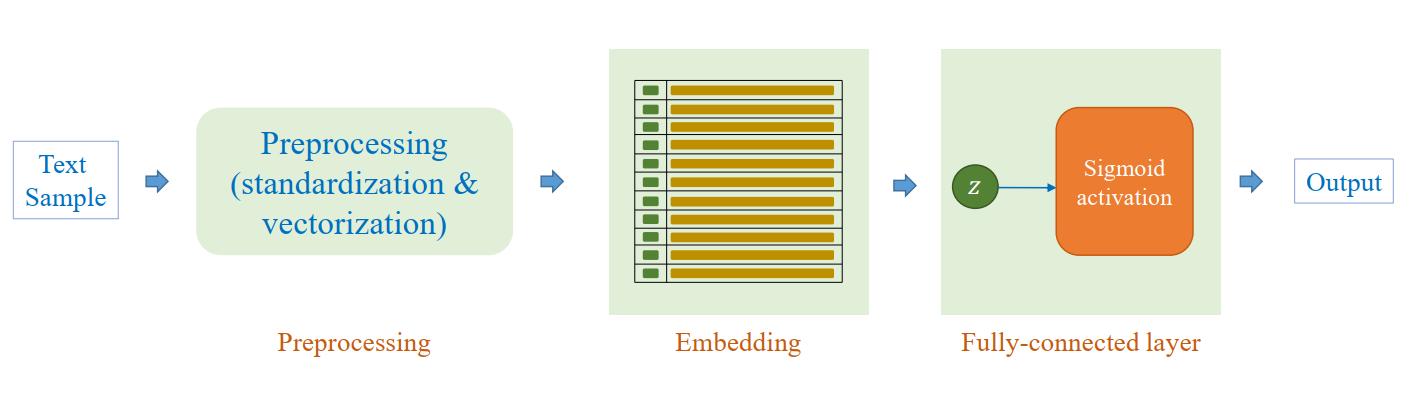

#### Preprocessing: Xử lí các từ ngữ bị dư thừa trong câu như các từ a, an, the, ... và một số thẻ trong định dạng HTML
#### Vectorization: Biến đổi câu thành các số, quy đổi thành chỉ số index đại diện cho mỗi từ trong câu (duy nhất và không đổi)
#### Embedding: Biến đổi các chữ số trên thành vector (thường sẽ là vector có độ dài là 128), từ đó thu được các một bảng gồm các vector đại diện cho từng từ
#### Fully-connected layer: Sử dụng MLP hoặc CNN để đưa ra output mong muốn

<hr>

* Các thông số trong quá trình thực hiện:<br>
    - Số lượng từ tối đa trong từ điển: Trong từ điển, tạo ra index từ 0 -> n-1 để chứa các từ. Mỗi từ ứng với 1 chỉ số index và không được thay đổi<br>
    - Số lượng từ tối đa trong câu: Khi câu đầu vào có chiều dài nhỏ hơn thì sẽ chèn thêm số 0 vào sau cho đủ. Khi câu đầu vào dài hơn chiều dày quy ước thì sẽ bị cắt ngang<br>
    - Độ dài của Embedding vector: Với 1 từ sau khi qua Embedding layer thì sẽ tạo thành 1 vector có độ dài tương ứng đã tạo<br>
=> Sau bước Embedding ta có được 1 bảng gồm n dòng (số từ trong từ điển) và mỗi dòng có độ dài là độ dài của Embedding vector

<hr>

## 1. Preprocessing, Vectorization

In [42]:
import tensorflow as tf

In [43]:
max_features = 8
sequence_length = 5
vectorization = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length
)

In [44]:
str1 = "I am studying English"
str2 = "I am learning AI"
str3 = "I am 21 years old"

In [45]:
vectorization.adapt([str1, str2, str3])

In [46]:
vectorization.get_vocabulary()

['', '[UNK]', 'i', 'am', 'years', 'studying', 'old', 'learning']

In [47]:
sample1 = "I am finding job and listening music"
sample2 = "I am studying"
a = vectorization([sample1, sample2])
print(a)

tf.Tensor(
[[2 3 1 1 1]
 [2 3 5 0 0]], shape=(2, 5), dtype=int64)


## 2. Embedding Vector

In [48]:
embedding = tf.keras.layers.Embedding(max_features, 4)

In [49]:
embedding(a)

<tf.Tensor: shape=(2, 5, 4), dtype=float32, numpy=
array([[[-0.02810788, -0.02239331, -0.02242479, -0.0170091 ],
        [-0.01232281,  0.0077078 , -0.00529845, -0.00444642],
        [-0.04482303, -0.04360214, -0.04162122, -0.02488949],
        [-0.04482303, -0.04360214, -0.04162122, -0.02488949],
        [-0.04482303, -0.04360214, -0.04162122, -0.02488949]],

       [[-0.02810788, -0.02239331, -0.02242479, -0.0170091 ],
        [-0.01232281,  0.0077078 , -0.00529845, -0.00444642],
        [ 0.03549561,  0.00273516, -0.00334074, -0.01285198],
        [-0.02151561,  0.02009317, -0.01872759,  0.04070065],
        [-0.02151561,  0.02009317, -0.01872759,  0.04070065]]],
      dtype=float32)>

## 3. MLP - Training

In [50]:
from tensorflow.keras import layers
import numpy as np

# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")

x = layers.Embedding(max_features, 4)(inputs)

x = layers.Flatten()(x)
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5)]               0         
                                                                 
 embedding_6 (Embedding)     (None, 5, 4)              32        
                                                                 
 flatten_2 (Flatten)         (None, 20)                0         
                                                                 
 predictions (Dense)         (None, 1)                 21        
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [51]:
print(model.layers[1].weights[0])

<tf.Variable 'embedding_6/embeddings:0' shape=(8, 4) dtype=float32, numpy=
array([[-0.01911535,  0.03225166,  0.04897573, -0.00126201],
       [-0.00077187, -0.00667977,  0.02028507, -0.01799424],
       [-0.0374514 , -0.02912791,  0.02766453,  0.04509535],
       [-0.000573  , -0.01952623,  0.04263662,  0.00809684],
       [ 0.0304322 ,  0.02407069, -0.0444738 ,  0.02195252],
       [ 0.03745903, -0.02665768, -0.03022157,  0.04474384],
       [-0.02230576, -0.00948646, -0.04691414,  0.01444349],
       [ 0.00990697,  0.00672693,  0.04386744,  0.04628472]],
      dtype=float32)>


In [52]:
sample1_vector = vectorization(str1)
sample1_vector = tf.reshape(sample1_vector, (1,sequence_length))

In [53]:
sample1_vector

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[2, 3, 5, 1, 0]], dtype=int64)>

In [54]:
y = np.array([[0.0]])
y = tf.convert_to_tensor(y)
print(y)

tf.Tensor([[0.]], shape=(1, 1), dtype=float64)


In [57]:
epochs = 10
model.fit(sample1_vector, y, epochs=epochs)

Epoch 1/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5279 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5248 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5216 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5185 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5154 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5123 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5091 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 1.0000


In [58]:
print(model.layers[1].weights[0])

<tf.Variable 'embedding_6/embeddings:0' shape=(8, 4) dtype=float32, numpy=
array([[-0.07880934, -0.02490404, -0.00771805,  0.05862946],
       [ 0.06613201,  0.05322558,  0.08069853, -0.08156734],
       [ 0.00864753, -0.08901748,  0.08873726,  0.10479162],
       [ 0.05873252, -0.07900592,  0.04901997, -0.05105108],
       [ 0.0304322 ,  0.02407069, -0.0444738 ,  0.02195252],
       [ 0.09789708,  0.03074748, -0.09051937,  0.10735906],
       [-0.02230576, -0.00948646, -0.04691414,  0.01444349],
       [ 0.00990697,  0.00672693,  0.04386744,  0.04628472]],
      dtype=float32)>
